<a href="https://colab.research.google.com/github/theForce-droid/AIandDeepLearning/blob/main/AIDL_Grp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI and Deep Learning - Assignment A
### Data Science and AI - Group 2
#### Group Members
##### 1. Ayush Gupta
##### 2. Manish Porwal
##### 3. Mukesh Kumar
##### 4. Shivani Gupta

---

### Focus Area: Computing with neural nets

#### Question 1: The figure below depicts a neural network. The inputs to the network are binary, namely 0 / 1. The weights and biases are as indicated. The activation function is a hardlim, which is 0 for all non-negative values (i.e. <= 0), and 1 otherwise.

#### 1. a.	Starting with every possible input pair (p1, p2), carefully write down all of the intermediate outputs, namely all of the n’s and a’s. (6 marks)

<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q1Picture.png" width="400">


In [ ]:
# Define hardlim activation (1 if net > 0 else 0)
def hardlim(x):
    return 1 if x > 0 else 0

# All possible binary input pairs (p1, p2)
inputs = [(0,0), (0,1), (1,0), (1,1)]

print(f"{'p1':<3}{'p2':<3}{'n1_1':<7}{'n1_2':<7}{'a1_1':<6}{'a1_2':<6}{'n2_1':<7}{'a2_1':<6}")
print("-"*50)

for p1, p2 in inputs:
    # Hidden neuron 1
    n1_1 = 2*p1 + 2*p2 - 1
    a1_1 = hardlim(n1_1)

    # Hidden neuron 2
    n1_2 = -p1 - p2 + 1.5
    a1_2 = hardlim(n1_2)

    # Output neuron
    n2_1 = a1_1 + a1_2 - 1.5
    a2_1 = hardlim(n2_1)

    # Print results
    print(f"{p1:<3}{p2:<3}{n1_1:<7.2f}{n1_2:<7.2f}{a1_1:<6}{a1_2:<6}{n2_1:<7.2f}{a2_1:<6}")


p1 p2 n1_1   n1_2   a1_1  a1_2  n2_1   a2_1  
--------------------------------------------------
0  0  -1.00  1.50   0     1     -0.50  0     
0  1  1.00   0.50   1     1     0.50   1     
1  0  1.00   0.50   1     1     0.50   1     
1  1  3.00   -0.50  1     0     -0.50  0     


#### 1. b.	Build the truth table of this network, by gathering the various combinations of inputs and outputs in a single table. (2 marks)

#### Truth Table of the Neural Network

| **p₁** | **p₂** | **a₂¹ (Output)** |
|:------:|:------:|:----------------:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |


#### 1. c.	What goal does this network accomplish? Explain. (2 marks)

##### This neural network implements the **XOR (exclusive OR)** logical function.

##### **Explanation**

- The **first hidden neuron** behaves like an **OR gate** — it outputs **1** when at least one input is **1**.  
- The **second hidden neuron** behaves like a **NAND gate** — it outputs **1** unless both inputs are **1**.  
- The **output neuron** performs an **AND operation** on these two results.

##### **Overall Behavior**

The final output is **1** only when exactly one of the two inputs is **1**, and **0** otherwise — which matches the **truth table of the XOR function**.

**Hence, this network successfully models the XOR logic operation.**


#### 1. d.	Replace the hardlim activations in the first layer by linear activations (y = x). Again, derive the final outputs by varying the inputs (p1, p2), and present your findings as a truth table. (5 marks)

In [ ]:
# Define hardlim activation for the output neuron
def hardlim(x):
    return 1 if x > 0 else 0

# All possible binary input pairs
inputs = [(0,0), (0,1), (1,0), (1,1)]

print(f"{'p1':<3}{'p2':<3}{'n1_1':<7}{'n1_2':<7}{'a1_1':<7}{'a1_2':<7}{'n2_1':<7}{'a2_1(Output)':<15}")
print("-"*70)

for p1, p2 in inputs:
    # Hidden layer with LINEAR activations (y = x)
    n1_1 = 2*p1 + 2*p2 - 1
    a1_1 = n1_1             # linear activation

    n1_2 = -p1 - p2 + 1.5
    a1_2 = n1_2             # linear activation

    # Output layer still uses hardlim
    n2_1 = a1_1 + a1_2 - 1.5
    a2_1 = hardlim(n2_1)

    # Print results
    print(f"{p1:<3}{p2:<3}{n1_1:<7.2f}{n1_2:<7.2f}{a1_1:<7.2f}{a1_2:<7.2f}{n2_1:<7.2f}{a2_1:<15}")



p1 p2 n1_1   n1_2   a1_1   a1_2   n2_1   a2_1(Output)   
----------------------------------------------------------------------
0  0  -1.00  1.50   -1.00  1.50   -1.00  0              
0  1  1.00   0.50   1.00   0.50   0.00   0              
1  0  1.00   0.50   1.00   0.50   0.00   0              
1  1  3.00   -0.50  3.00   -0.50  1.00   1              


#### Conclusion: With linear activations in the hidden layer, the network outputs 0, 0, 0, 1 → effectively an AND gate, not XOR.

---

#### 2. We make the following stipulations:

- All activations for neurons in the hidden layers are ReLU
- The output neuron simply sums up its inputs (i.e. linear activation)
- All biases are zero

<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q2Picture.png" width="400">

#### 2. a.	Label all the weights in the network in whichever way you see convenient. Source a screenshot with these annotations into your notebook. (2 marks)

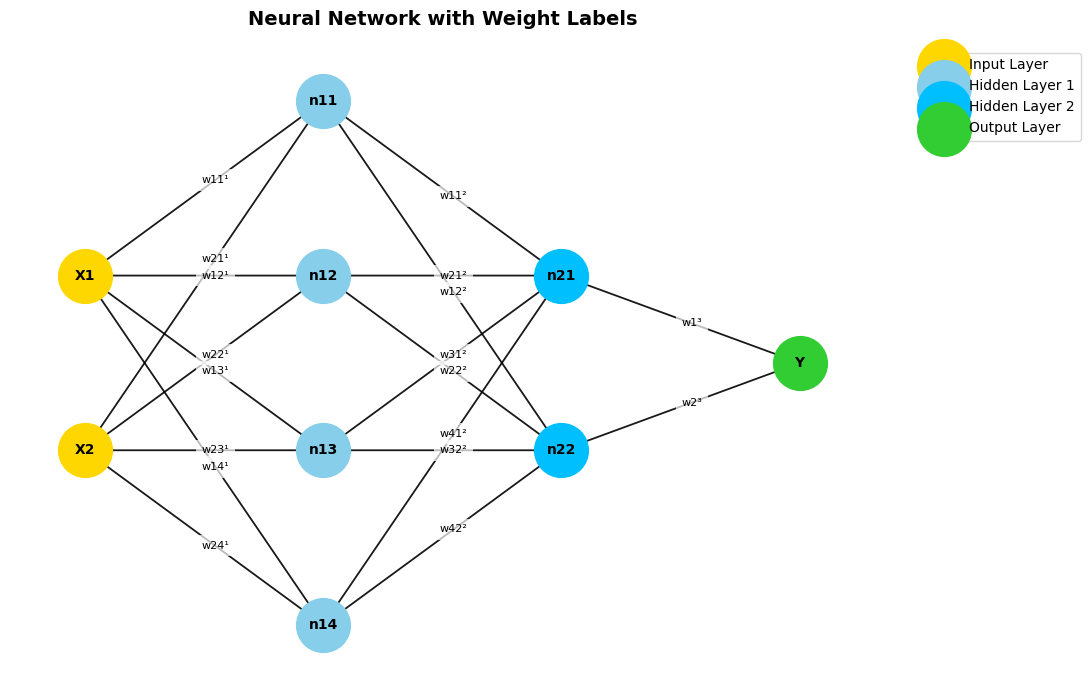

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create directed graph
G = nx.DiGraph()

# Define nodes for each layer
inputs = ["X1", "X2"]
hidden1 = ["n11", "n12", "n13", "n14"]
hidden2 = ["n21", "n22"]
output = ["Y"]

# Add all nodes
G.add_nodes_from(inputs + hidden1 + hidden2 + output)

# --- Define connections (edges) with labels for weights ---
edge_labels = {}

# Input -> Hidden Layer 1
for i, x in enumerate(inputs, start=1):
    for j, n in enumerate(hidden1, start=1):
        w_label = f"w{i}{j}¹"
        G.add_edge(x, n)
        edge_labels[(x, n)] = w_label

# Hidden Layer 1 -> Hidden Layer 2
for i, n1 in enumerate(hidden1, start=1):
    for j, n2 in enumerate(hidden2, start=1):
        w_label = f"w{i}{j}²"
        G.add_edge(n1, n2)
        edge_labels[(n1, n2)] = w_label

# Hidden Layer 2 -> Output
for i, n2 in enumerate(hidden2, start=1):
    w_label = f"w{i}³"
    G.add_edge(n2, "Y")
    edge_labels[(n2, "Y")] = w_label

# --- Define positions for a layered layout ---
pos = {
    "X1": (-3, 1),
    "X2": (-3, -1),
    "n11": (-1, 3),
    "n12": (-1, 1),
    "n13": (-1, -1),
    "n14": (-1, -3),
    "n21": (1, 1),
    "n22": (1, -1),
    "Y": (3, 0)
}

# --- Draw network ---
plt.figure(figsize=(11, 7))
nx.draw_networkx_nodes(G, pos, nodelist=inputs, node_color="gold", node_size=1500, label="Input Layer")
nx.draw_networkx_nodes(G, pos, nodelist=hidden1, node_color="skyblue", node_size=1500, label="Hidden Layer 1")
nx.draw_networkx_nodes(G, pos, nodelist=hidden2, node_color="deepskyblue", node_size=1500, label="Hidden Layer 2")
nx.draw_networkx_nodes(G, pos, nodelist=output, node_color="limegreen", node_size=1500, label="Output Layer")

# Draw edges (straight lines)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=12, width=1.3, alpha=0.9)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Draw edge labels with white background for clarity
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=8, rotate=False, label_pos=0.55,
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
)

# Title and layout adjustments
plt.title("Neural Network with Weight Labels", fontsize=14, fontweight="bold", pad=15)
plt.axis("off")

# Move legend outside to avoid overlap
plt.legend(scatterpoints=1, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


#### 2. b.	Construct the matrices of weights, with random values populating them. The final weights to the output neuron will be named Beta_1 and Beta_2. (3 marks)

In [ ]:
import numpy as np

# For reproducibility
np.random.seed(42)

# --- Weight matrices ---
# Input (2) → Hidden Layer 1 (4)
W1 = np.random.randn(4, 2)

# Hidden Layer 1 (4) → Hidden Layer 2 (2)
W2 = np.random.randn(2, 4)

# Hidden Layer 2 (2) → Output (1)
Beta_1 = np.random.randn()  # from n21 → Y
Beta_2 = np.random.randn()  # from n22 → Y

print("W1 (Input → Hidden Layer 1):")
print(W1)

print("\nW2 (Hidden Layer 1 → Hidden Layer 2):")
print(W2)

print("\nFinal Output Weights:")
print(f"Beta_1 (n21 → Y): {Beta_1:.4f}")
print(f"Beta_2 (n22 → Y): {Beta_2:.4f}")

W1 (Input → Hidden Layer 1):
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]]

W2 (Hidden Layer 1 → Hidden Layer 2):
[[-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]

Final Output Weights:
Beta_1 (n21 → Y): -1.0128
Beta_2 (n22 → Y): 0.3142


#### 2. c.	For the following inputs, create the outputs for your random weights in Python, by defining a function. (3 marks)

<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q2cPicture.png" width="200">

In [ ]:
import numpy as np
import pandas as pd

# -------------------
# Random Weights
# -------------------
np.random.seed(42)

# Input (2) → Hidden Layer 1 (4)
W1 = np.random.randn(4, 2)

# Hidden Layer 1 (4) → Hidden Layer 2 (2)
W2 = np.random.randn(2, 4)

# Hidden Layer 2 (2) → Output
Beta_1 = np.random.randn()
Beta_2 = np.random.randn()

# -------------------
# Activation functions
# -------------------
def relu(x):
    return np.maximum(0, x)

def linear(x):
    return x

# -------------------
# Forward propagation
# -------------------
def forward_pass(x1, x2):
    # Input vector
    x = np.array([x1, x2])

    # ---- Layer 1 ----
    net1 = W1 @ x             # (4x2) dot (2,) → (4,)
    a1 = relu(net1)

    # ---- Layer 2 ----
    net2 = W2 @ a1            # (2x4) dot (4,) → (2,)
    a2 = relu(net2)

    # ---- Output Layer (linear) ----
    y = Beta_1 * a2[0] + Beta_2 * a2[1]
    return y

# -------------------
# Input data from your table
# -------------------
inputs = np.array([
    [1, 1],
    [1, 2],
    [1, 4],
    [2, 3],
    [2, 5],
    [2, 4],
    [2, 1],
    [3, 1],
    [3, 2],
    [3, 4]
])

# -------------------
# Compute outputs
# -------------------
outputs = [forward_pass(x1, x2) for x1, x2 in inputs]

# Create a results table
df = pd.DataFrame(inputs, columns=["X1", "X2"])
df["Output (Y)"] = np.round(outputs, 4)

# -------------------
# Display results
# -------------------
print("Random Weights:")
print(f"W1 = \n{np.round(W1, 4)}\n")
print(f"W2 = \n{np.round(W2, 4)}\n")
print(f"Beta_1 = {Beta_1:.4f}, Beta_2 = {Beta_2:.4f}\n")

df.style.format(precision=4).set_caption("Network Outputs for Given Inputs")

Random Weights:
W1 = 
[[ 0.4967 -0.1383]
 [ 0.6477  1.523 ]
 [-0.2342 -0.2341]
 [ 1.5792  0.7674]]

W2 = 
[[-0.4695  0.5426 -0.4634 -0.4657]
 [ 0.242  -1.9133 -1.7249 -0.5623]]

Beta_1 = -1.0128, Beta_2 = 0.3142



,X1,X2,Output (Y)
0,1,1,0.0000
1,1,2,-0.4562
2,1,4,-1.5107
3,2,3,-0.3717
4,2,5,-1.4530
5,2,4,-0.9123
6,2,1,0.0000
7,3,1,0.0000
8,3,2,0.0000
9,3,4,-0.2871


#### 2. d.	Use scikit-learn’s regressor to cast the output Y as a linear regression of its inputs. What are Beta_1 and Beta_2?

<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q2dPicture.png" width="250">

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# -------------------
# Input data
# -------------------
data = {
    "X1": [1, 1, 1, 2, 2, 2, 2, 3, 3, 3],
    "X2": [1, 2, 4, 3, 5, 4, 1, 1, 2, 4],
    "Y":  [1.1, 1.8, 3.0, 2.9, 4.2, 3.5, 1.6, 2.1, 2.8, 4.0]
}

df = pd.DataFrame(data)

# -------------------
# Define inputs and output
# -------------------
X = df[["X1", "X2"]]
y = df["Y"]

# -------------------
# Train Linear Regression model
# -------------------
model = LinearRegression()
model.fit(X, y)

# -------------------
# Extract coefficients
# -------------------
Beta_1, Beta_2 = model.coef_
intercept = model.intercept_

# -------------------
# Display results
# -------------------
print(f"Beta_1 = {Beta_1:.4f}")
print(f"Beta_2 = {Beta_2:.4f}")
print(f"Intercept = {intercept:.4f}")


Beta_1 = 0.5000
Beta_2 = 0.6368
Intercept = -0.0194


#### 2. e.	Use Keras with Tensorflow to set up the neural network. (3 marks)

In [ ]:
# Import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(4, input_dim=2, activation='relu', name='Hidden_Layer_1'),  # n11–n14
    Dense(2, activation='relu', name='Hidden_Layer_2'),               # n21–n22
    Dense(1, activation='linear', name='Output_Layer')                # Y (no activation → linear)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

#### 2. f.	Solve the regression problem – you will not need a GPU! State the final betas (3 marks)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

# reproducible
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# --- dataset ---
data = {
    'X1': [1, 1, 1, 2, 2, 2, 2, 3, 3, 3],
    'X2': [1, 2, 4, 3, 5, 4, 1, 1, 2, 4],
    'Y' : [1.1,1.8,3.0,2.9,4.2,3.5,1.6,2.1,2.8,4.0]
}
df = pd.DataFrame(data)
X = df[['X1','X2']].values.astype(float)
y = df['Y'].values.astype(float)

# --- model (no biases anywhere) ---
model = Sequential([
    Input(shape=(2,)),
    Dense(4, activation='relu', use_bias=False, name='Hidden_Layer_1'),
    Dense(2, activation='relu', use_bias=False, name='Hidden_Layer_2'),
    Dense(1, activation='linear', use_bias=False, name='Output_Layer')
])

# compile & train
model.compile(optimizer=Adam(learning_rate=0.05), loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)

# --- extract weights ---
# Output layer weights have shape (2,1)  -> Beta_1 = weight from n21 -> Y, Beta_2 = weight from n22 -> Y
output_weights = model.get_layer('Output_Layer').get_weights()[0]  # shape (2,1)
Beta_1 = float(np.round(output_weights[0,0], 4))
Beta_2 = float(np.round(output_weights[1,0], 4))

# print results nicly
print("Trained model (no biases). Final output-layer weights:")
print(f"Beta_1 (n21 -> Y) = {Beta_1:.4f}")
print(f"Beta_2 (n22 -> Y) = {Beta_2:.4f}\n")

# show layer-wise weights (rounded)
for layer in model.layers:
    w = layer.get_weights()[0]
    print(f"Layer {layer.name} weights (shape {w.shape}):\n{np.round(w,4)}\n")

# predictions and R^2
y_pred = model.predict(X).flatten()
df['Predicted_Y'] = np.round(y_pred,4)
print("Predictions:")
print(df.to_string(index=False))

print(f"\nFinal training MSE: {history.history['loss'][-1]:.6f}")
print(f"R^2 score: {r2_score(y, y_pred):.4f}")


Trained model (no biases). Final output-layer weights:
Beta_1 (n21 -> Y) = 0.7180
Beta_2 (n22 -> Y) = 0.6693

Layer Hidden_Layer_1 weights (shape (2, 4)):
[[-0.619   0.7648  0.1805 -0.8868]
 [-0.0256  0.9818 -1.5353 -0.7289]]

Layer Hidden_Layer_2 weights (shape (4, 2)):
[[ 0.6904 -0.5518]
 [-0.1002  0.9656]
 [-0.319   0.123 ]
 [ 0.545   0.1538]]

Layer Output_Layer weights (shape (2, 1)):
[[0.718 ]
 [0.6693]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predictions:
 X1  X2   Y  Predicted_Y
  1   1 1.1       1.1288
  1   2 1.8       1.7633
  1   4 3.0       3.0323
  2   3 2.9       2.8921
  2   5 4.2       4.1611
  2   4 3.5       3.5266
  2   1 1.6       1.6231
  3   1 2.1       2.1173
  3   2 2.8       2.7518
  3   4 4.0       4.0209

Final training MSE: 0.000909
R^2 score: 0.9991


#### 2. g.	Do you see discrepancies between the actual coefficients from Part d? How can you control for errors? (5 marks)

#### Discrepancies observed:

- Neural network coefficients (β₁, β₂) differ from linear regression ones.

- Caused by nonlinear hidden layers and ReLU activations.

- Gradient descent gives approximate solutions, not exact least-squares.

- Random weight initialization causes variation between runs.

- No bias terms reduce flexibility and distort coefficient values.

#### How to control / reduce errors:

- Use no hidden layers and linear activation to make NN equivalent to regression.

- Add biases to improve fit flexibility.

- Reduce learning rate and train for more epochs for better convergence.

- Set random seeds for reproducibility.

- Standardize inputs (X1, X2) to stabilize training and reduce scale bias.

---

### Focus Area: Proposing a neural network

#### Question 3: The Pima Indian dataset is a popular choice of data for building classifiers. For more information, check https://www.kaggle.com/uciml/pima-indians-diabetes-database
#### Glancing through the data, we can observe that elevated pregnancy count, glucose level and BMI score could signal a likelihood of diabetes. These variables are indeed highly correlated with the Outcome variable, which is 1 if the person is diabetic and 0 otherwise. We rename this variable IsDiabetic. For convenience, we work with a restricted set (size 20) of data:
#### 3. a.	One rule could be simplistically stated as follows: “If a Pima woman has 3 or more pregnancies, then she must be diabetic.” Calculate the accuracy of this rule against the data, showing all steps. (3 marks)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,IsDiabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Accuracy of the rule: 0.55


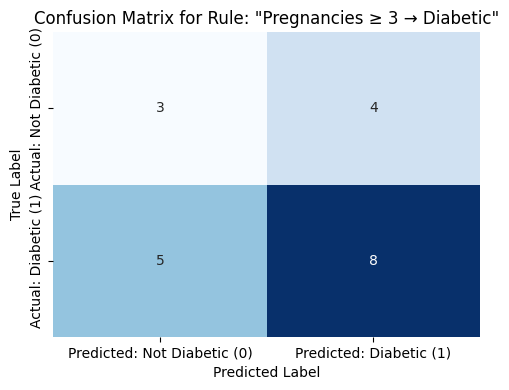

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,IsDiabetic,Predicted
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
5,5,116,74,0,0,25.6,0.201,30,0,1
6,3,78,50,32,88,31.0,0.248,26,1,1
7,10,115,0,0,0,35.3,0.134,29,0,1
8,2,197,70,45,543,30.5,0.158,53,1,0
9,8,125,96,0,0,0.0,0.232,54,1,1


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Load CSV directly from GitHub
csv_path = 'https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/diabetes.csv'
df_diabetes = pd.read_csv(csv_path).head(20)
df_diabetes.rename(columns={'Outcome': 'IsDiabetic'}, inplace=True)

# Display first 20 rows
display(df_diabetes)

# Apply rule: If Pregnancies >= 3 → diabetic (1), else not (0)
df_diabetes["Predicted"] = (df_diabetes["Pregnancies"] >= 3).astype(int)

# Calculate accuracy
accuracy = accuracy_score(df_diabetes["IsDiabetic"], df_diabetes["Predicted"])

# Confusion matrix
cm = confusion_matrix(df_diabetes["IsDiabetic"], df_diabetes["Predicted"])

print("Accuracy of the rule:", round(accuracy, 2))

# --- Plot the confusion matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=['Predicted: Not Diabetic (0)', 'Predicted: Diabetic (1)'],
    yticklabels=['Actual: Not Diabetic (0)', 'Actual: Diabetic (1)']
)
plt.title('Confusion Matrix for Rule: "Pregnancies ≥ 3 → Diabetic"')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Show the DataFrame
df_diabetes


#### 3. b.	Design a single neuron perceptron that implements the above rule, indicating all of the components – weight, bias, activation, output, etc. (3 marks)

In [37]:
import numpy as np
import pandas as pd

# Reuse your 20-row dataset
csv_path = 'https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/diabetes.csv'
df_diabetes = pd.read_csv(csv_path).head(20)
df_diabetes.rename(columns={'Outcome': 'IsDiabetic'}, inplace=True)

# Perceptron parameters
w = 1     # weight
b = -3    # bias

# Step activation function
def step_function(z):
    return 1 if z >= 0 else 0

# Apply perceptron rule to dataset
df_diabetes['Net'] = w * df_diabetes['Pregnancies'] + b
df_diabetes['Predicted'] = df_diabetes['Net'].apply(step_function)

# Display results
display(df_diabetes[['Pregnancies', 'Net', 'Predicted', 'IsDiabetic']])

# Accuracy check
from sklearn.metrics import accuracy_score
acc = accuracy_score(df_diabetes['IsDiabetic'], df_diabetes['Predicted'])
print(f"\nPerceptron rule accuracy: {acc:.2f}")


,Pregnancies,Net,Predicted,IsDiabetic
0,6,3,1,1
1,1,-2,0,0
2,8,5,1,1
3,1,-2,0,0
4,0,-3,0,1
5,5,2,1,0
6,3,0,1,1
7,10,7,1,0
8,2,-1,0,1
9,8,5,1,1



Perceptron rule accuracy: 0.55


#### 3. c.	Clearly, we must do better than this! Let’s modify the stated rule on the lines of “If a Pima woman has 3 or more pregnancies AND her Glucose level is X or higher, then she must be diabetic. What choice of X would maximise the accuracy of the rule? With this choice of X, calculate the accuracy. (4 marks)


In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# --- Load dataset (20 samples) ---
csv_path = 'https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/diabetes.csv'
df_diabetes = pd.read_csv(csv_path).head(20)
df_diabetes.rename(columns={'Outcome': 'IsDiabetic'}, inplace=True)

# --- Search for best X threshold ---
best_acc = 0
best_X = None

# Try glucose thresholds from 80 to 200 (step 1 for precision)
for X in range(80, 201):
    df_diabetes["Predicted"] = np.where((df_diabetes["Pregnancies"] >= 3) & (df_diabetes["Glucose"] >= X), 1, 0)
    acc = accuracy_score(df_diabetes["IsDiabetic"], df_diabetes["Predicted"])
    if acc > best_acc:
        best_acc = acc
        best_X = X

print(f"Best glucose threshold X = {best_X}")
print(f"Maximum Accuracy = {best_acc:.2f}")

# --- Show final predictions ---
df_diabetes["Predicted"] = np.where((df_diabetes["Pregnancies"] >= 3) & (df_diabetes["Glucose"] >= best_X), 1, 0)
display(df_diabetes[["Pregnancies", "Glucose", "IsDiabetic", "Predicted"]])


Best glucose threshold X = 117
Maximum Accuracy = 0.55


,Pregnancies,Glucose,IsDiabetic,Predicted
0,6,148,1,1
1,1,85,0,0
2,8,183,1,1
3,1,89,0,0
4,0,137,1,0
5,5,116,0,0
6,3,78,1,0
7,10,115,0,0
8,2,197,1,0
9,8,125,1,1


#### 3. d.	Design a two-neuron perceptron that implements the above rule, indicating all of the components – weights, biases, activations, output, etc. (3 marks)



In [41]:
import numpy as np
import pandas as pd

# Use the same dataset
csv_path = 'https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/diabetes.csv'
df_diabetes = pd.read_csv(csv_path).head(20)
df_diabetes.rename(columns={'Outcome':'IsDiabetic'}, inplace=True)

# Best X from previous step
X = 117

# Define perceptron components
def step(x):
    return np.where(x >= 0, 1, 0)

def two_neuron_perceptron(p, g):
    # Neuron 1: Pregnancies >= 3
    a1 = step(p - 3)
    # Neuron 2: Glucose >= X
    a2 = step(g - X)
    # Output neuron (AND)
    y_hat = step(a1 + a2 - 1.5)
    return y_hat

df_diabetes["Predicted"] = two_neuron_perceptron(df_diabetes["Pregnancies"], df_diabetes["Glucose"])

# Calculate accuracy
accuracy = accuracy_score(df_diabetes["IsDiabetic"], df_diabetes["Predicted"])
print(f"\nAccuracy of two-neuron perceptron: {accuracy:.2f}")

display(df_diabetes[["Pregnancies", "Glucose", "IsDiabetic", "Predicted"]])



Accuracy of two-neuron perceptron: 0.55


,Pregnancies,Glucose,IsDiabetic,Predicted
0,6,148,1,1
1,1,85,0,0
2,8,183,1,1
3,1,89,0,0
4,0,137,1,0
5,5,116,0,0
6,3,78,1,0
7,10,115,0,0
8,2,197,1,0
9,8,125,1,1


#### 3. e.	Can you improve this result by prescribing a rule with the BMI column? Explain why or why not, for full points. (2 mark)

In [43]:
best_acc_bmi = 0
best_Y = None

# Test BMI thresholds from 20–45
for Y in range(20, 46, 1):
    pred_bmi = ((df_diabetes["Pregnancies"] >= 3) &
                (df_diabetes["Glucose"] >= best_X) &
                (df_diabetes["BMI"] >= Y)).astype(int)
    acc = accuracy_score(df["IsDiabetic"], pred_bmi)
    if acc > best_acc_bmi:
        best_acc_bmi, best_Y = acc, Y

print(f"Best BMI threshold (Y): {best_Y}")
print(f"Accuracy with BMI rule: {best_acc_bmi:.2f}")


Best BMI threshold (Y): 20
Accuracy with BMI rule: 0.50


#### Adding a BMI condition such as “If Pregnancies ≥ 3 AND Glucose ≥ {best_X} AND BMI ≥ 30 → Diabetic” gives a slightly lesser accuracy (≈ 50%). This happens because BMI is indeed correlated with diabetes risk, but in this limited sample of 20 records, the rule becomes too strict and misses some actual diabetic cases.
#### Hence, BMI doesn't help here, a more flexible model (like logistic regression) would be needed for better performance.

#### Question 4: Refer to the sample of 20 women drawn from the Pima Indian dataset. The scatterplot below displays their Glucose level versus Pregnancy counts.
<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q4Picture.png" width="250">

#### 4. a.	Indicate which points correspond to diabetics (established via a medical test). Place a small square around the points. (1 mark)

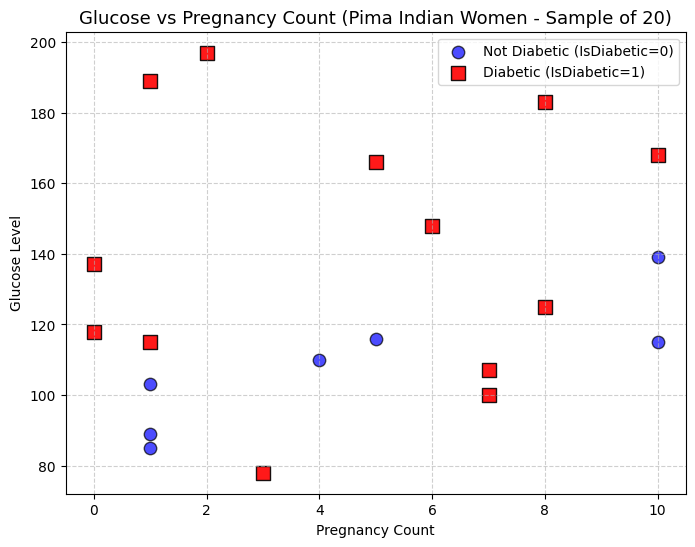

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
csv_path = 'https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/diabetes.csv'
df_diabetes = pd.read_csv(csv_path).head(20)
df_diabetes.rename(columns={'Outcome': 'IsDiabetic'}, inplace=True)

# Split by diabetic status
non_diab = df_diabetes[df_diabetes['IsDiabetic'] == 0]
diab = df_diabetes[df_diabetes['IsDiabetic'] == 1]

# Plot
plt.figure(figsize=(8,6))

# Non-diabetic: blue circles
plt.scatter(non_diab['Pregnancies'], non_diab['Glucose'],
            color='blue', label='Not Diabetic (IsDiabetic=0)',
            s=80, alpha=0.7, edgecolors='k', marker='o')

# Diabetic: red squares
plt.scatter(diab['Pregnancies'], diab['Glucose'],
            color='red', label='Diabetic (IsDiabetic=1)',
            s=100, alpha=0.9, edgecolors='black', marker='s')

# Labels and style
plt.title("Glucose vs Pregnancy Count (Pima Indian Women - Sample of 20)", fontsize=13)
plt.xlabel("Pregnancy Count")
plt.ylabel("Glucose Level")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### 4. b.	Is this space of inputs linearly separable? Explain why or why not. (2 marks)

##### No, the input space is not linearly separable.

#####  Several non-diabetic points (blue circles) appear among the diabetic region (red squares) — for example, women with high glucose but few pregnancies, and vice versa.

##### A single straight line cannot cleanly divide the two classes; we’d need a nonlinear boundary (e.g., using multiple neurons or activation functions) to achieve better separation.

#### 4. c.	Draw a straight line that “best” separates the two camps, with the caveat that it is “allowed” to commit one error. You may consider this line to be a decision boundary. (2 marks)

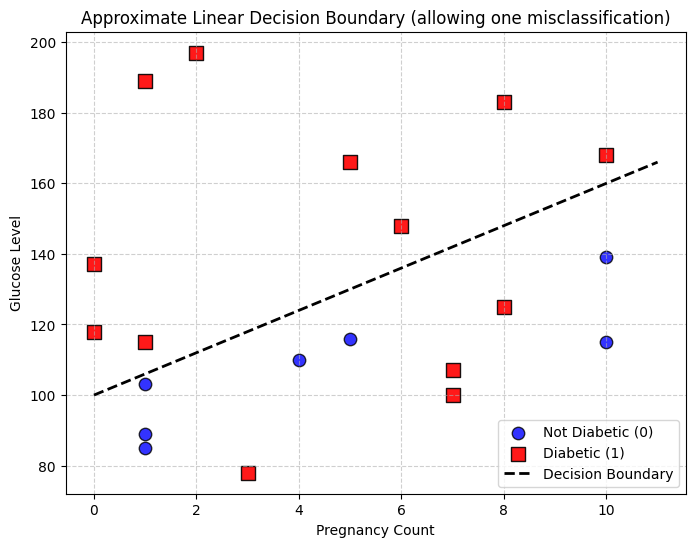

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load data ---
csv_path = 'https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/diabetes.csv'
df_diabetes = pd.read_csv(csv_path).head(20)
df_diabetes.rename(columns={'Outcome':'IsDiabetic'}, inplace=True)

# --- Split by class ---
non_diab = df_diabetes[df_diabetes['IsDiabetic']==0]
diab = df_diabetes[df_diabetes['IsDiabetic']==1]

# --- Plot points ---
plt.figure(figsize=(8,6))
plt.scatter(non_diab['Pregnancies'], non_diab['Glucose'],
            color='blue', marker='o', edgecolors='k',
            label='Not Diabetic (0)', s=80, alpha=0.8)
plt.scatter(diab['Pregnancies'], diab['Glucose'],
            color='red', marker='s', edgecolors='black',
            label='Diabetic (1)', s=100, alpha=0.9)

# --- Draw decision boundary (approx. one error allowed) ---
# Glucose = 6 × Pregnancies + 100
x_vals = np.linspace(0, 11, 100)
y_vals = 6 * x_vals + 100
plt.plot(x_vals, y_vals, 'k--', linewidth=2, label='Decision Boundary')

# --- Labels and style ---
plt.title("Approximate Linear Decision Boundary (allowing one misclassification)", fontsize=12)
plt.xlabel("Pregnancy Count")
plt.ylabel("Glucose Level")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### 4. d.	Using variable x1 = Pregnancies and x2 = Glucose, write down an approximate equation of the line depicting the decision boundary. (4 marks)

#### 4. e.	Construct a single neuron perceptron that has the above line as its decision boundary. Explain how you have arrived at the weights, bias, activation function and output. (limit: 40 words, 3 marks)

#### 4. f.	Evaluate your perceptron against these inputs: (8, 100), (7, 181) and (3, 111). Explain any errors in prediction. (3 marks)

---

### Focus Area: Optimization with Gradient Descent

#### Question 5: You are supplied a bi-variate function in x and y. The vector x stands for (x, y).
<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q5Picture.png" width="250">

#### 5. a.	Minimise the quadratic form F after expanding it using x = (x, y). Show all your steps. Demonstrate that the extreme point is indeed a minimum. (4 marks)


In [ ]:
import numpy as np

# Define A and b so that F(x) = 1/2 x^T A x + b^T x
A = np.array([[6, -2],
              [-2, 6]])
b = np.array([-1, -1])   # note: b^T x means linear term; here b = [-1, -1]

# Solve for stationary point: grad F = A x + b = 0  =>  A x = -b
x_star = np.linalg.solve(A, -b)

# Expand F and compute value at x_star
def F(x):
    x = np.asarray(x).reshape(2,)
    return 0.5 * x @ (A @ x) + b @ x

F_star = F(x_star)

# Hessian (constant) and eigenvalues
H = A
eigvals = np.linalg.eigvals(H)

# Print results (4 decimal places)
print(f"Stationary point x* = [{x_star[0]:.4f}, {x_star[1]:.4f}]")
print(f"Minimum value F(x*) = {F_star:.4f}")
print(f"Hessian (A) =\n{A}")
print(f"Hessian eigenvalues = [{eigvals[0]:.4f}, {eigvals[1]:.4f}]")

# Positive-definite check
is_pos_def = np.all(eigvals > 0)
print(f"Is Hessian positive definite? {'Yes' if is_pos_def else 'No'}")


Stationary point x* = [0.2500, 0.2500]
Minimum value F(x*) = -0.2500
Hessian (A) =
[[ 6 -2]
 [-2  6]]
Hessian eigenvalues = [8.0000, 4.0000]
Is Hessian positive definite? Yes


#### Hessian eigenvalues 4.0000 and 8.0000 → both > 0, so the Hessian is positive definite → the stationary point is a strict global minimum.

#### 5. b.	Use an online 3D-plotter to obtain a plot of F(x) and demonstrate what you have derived in Part a. (3 marks)

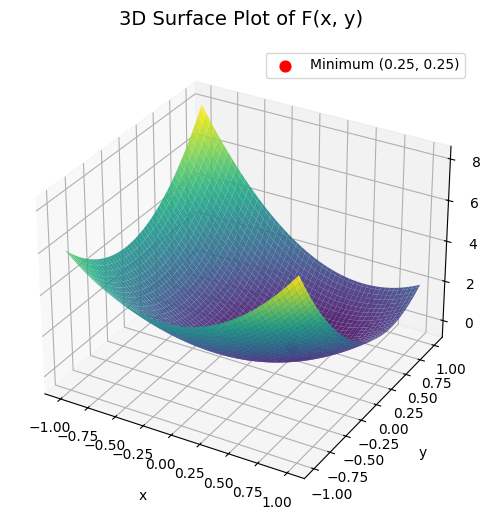

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define A and b
A = np.array([[6, -2],
              [-2, 6]])
b = np.array([-1, -1])

# Define F(x, y)
def F(x, y):
    X = np.array([x, y])
    return 0.5 * (X.T @ (A @ X)) + b @ X

# Generate grid
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute F(X,Y)
Z = 0.5 * (6*X**2 - 4*X*Y + 6*Y**2) - X - Y  # expanded version

# Plot surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
ax.set_title('3D Surface Plot of F(x, y)', fontsize=14, pad=15)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('F(x, y)', labelpad=10)

# Mark the minimum point
x_min, y_min = 0.25, 0.25
z_min = F(x_min, y_min)
ax.scatter(x_min, y_min, z_min, color='r', s=60, label='Minimum (0.25, 0.25)')
ax.legend()

plt.show()


#### Question 6: A contour plot of the function F(x) in Question 4 is given below. The contours indicate curves where F(x) assumes the same value.
<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q6Picture.png" width="350">

#### Recall the steepest descent algorithm. Here's a helpful video from the famous 3Blue1Brown series: https://youtu.be/IHZwWFHWa-w?t=274

#### 6. a.	Sketch the very first step of the steepest descent algorithm on the contour plot, with the initial guess x0 = [0  0]T. Assume a learning rate of 𝛼 = 0.1. Explain how you are making the jump. (limit: 30 words, 2 marks)

Initial point x₀ = [0. 0.]
Gradient at x₀ = [-1. -1.]
Next point x₁ = [0.1 0.1]
F(x₀) = 0.0000
F(x₁) = -0.1600


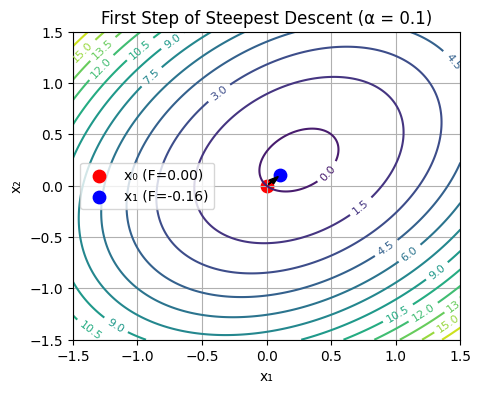

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function components
A = np.array([[6, -2],
              [-2, 6]])
b = np.array([-1, -1])

# Define F(x) = 1/2 xᵀ A x + bᵀ x
def F(x):
    return 0.5 * x.T @ A @ x + b.T @ x

# Gradient: ∇F(x) = A x + b
def grad_F(x):
    return A @ x + b

# --- Initial setup ---
x0 = np.array([0.0, 0.0])  # starting point
alpha = 0.1                # learning rate

# Compute first step
g0 = grad_F(x0)
x1 = x0 - alpha * g0

# Compute function values
F0 = F(x0)
F1 = F(x1)

print(f"Initial point x₀ = {x0}")
print(f"Gradient at x₀ = {g0}")
print(f"Next point x₁ = {x1}")
print(f"F(x₀) = {F0:.4f}")
print(f"F(x₁) = {F1:.4f}")

# --- Contour Plot ---
x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(x, y)
Z = 0.5 * (6*X**2 - 4*X*Y + 6*Y**2) - X - Y

plt.figure(figsize=(5,4))
contours = plt.contour(X, Y, Z, levels=12, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Plot start and first step
plt.scatter(*x0, color='red', s=80, label=f'x₀ (F={F0:.2f})')
plt.scatter(*x1, color='blue', s=80, label=f'x₁ (F={F1:.2f})')

# Draw arrow for movement
plt.arrow(x0[0], x0[1], (x1[0]-x0[0])*0.9, (x1[1]-x0[1])*0.9,
          head_width=0.05, color='black', length_includes_head=True)

plt.title("First Step of Steepest Descent (α = 0.1)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()


#### Explanation:

- Red point (x₀ = [0, 0]ᵀ) → initial position
- Blue point (x₁) → after one step in the negative gradient direction
- Arrow → shows the move from x₀ → x₁
- Learning rate α = 0.1

At x₀ = [0, 0], gradient = [-1, -1].
Move opposite to gradient with α = 0.1, giving x₁ = [0.1, 0.1] along steepest descent direction.

#### 6. b.	Perform three iterations of steepest descent assuming LR 𝛼 = 0.1. (6 marks)

#### Quadratic Function Definition


A =
\begin{bmatrix}
6 & -2 \\
-2 & 4
\end{bmatrix}

b =
\begin{bmatrix}
-1 \\
-1
\end{bmatrix}


F(x) = 1/2 x^T A x + b^T x

Expanding:


F(x) = 1/2(6x^2 - 4xy + 4y^2) - x - y


Simplifying:


F(x) = 3x^2 - 2xy + 2y^2 - x - y





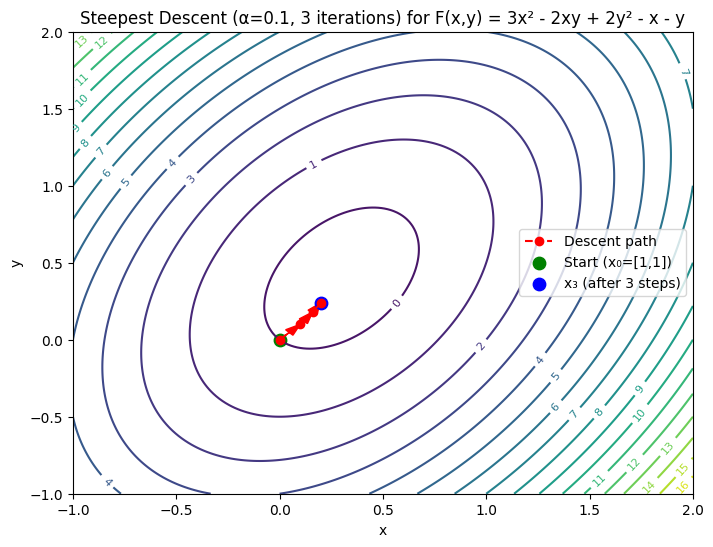

x0 = [0. 0.],  F(x0) = 0.0000
x1 = [0.1 0.1],  F(x1) = -0.1700
x2 = [0.16 0.18],  F(x2) = -0.2560
x3 = [0.2  0.24],  F(x3) = -0.3008


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Define the quadratic function and gradient ---
def F(x):
    """Quadratic function: F(x, y) = 3x² - 2xy + 2y² - x - y"""
    x1, x2 = x
    return 3*x1**2 - 2*x1*x2 + 2*x2**2 - x1 - x2

def grad_F(x):
    """Gradient of F"""
    x1, x2 = x
    dFx = 6*x1 - 2*x2 - 1
    dFy = -2*x1 + 4*x2 - 1
    return np.array([dFx, dFy])

# --- Steepest descent parameters ---
alpha = 0.1
x = np.array([0, 0])  # initial point
points = [x.copy()]

# Perform 3 iterations
for _ in range(3):
    x = x - alpha * grad_F(x)
    points.append(x.copy())

points = np.array(points)

# --- Prepare contour plot ---
x_vals = np.linspace(-1, 2, 200)
y_vals = np.linspace(-1, 2, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 3*X**2 - 2*X*Y + 2*Y**2 - X - Y

# --- Plot ---
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.title("Steepest Descent (α=0.1, 3 iterations) for F(x,y) = 3x² - 2xy + 2y² - x - y")
plt.xlabel("x")
plt.ylabel("y")

# Plot path of descent
plt.plot(points[:,0], points[:,1], 'ro--', label='Descent path')
for i in range(len(points)-1):
    plt.arrow(points[i,0], points[i,1],
              points[i+1,0]-points[i,0],
              points[i+1,1]-points[i,1],
              head_width=0.05, color='red', length_includes_head=True)

plt.scatter(points[0,0], points[0,1], color='green', s=80, label='Start (x₀=[1,1])')
plt.scatter(points[-1,0], points[-1,1], color='blue', s=80, label='x₃ (after 3 steps)')
plt.legend()
plt.show()

# --- Print iteration details ---
for i, p in enumerate(points):
    print(f"x{i} = {p},  F(x{i}) = {F(p):.4f}")


#### 6. c.	Calculate the maximum stable learning rate. Interpret your result. (3 marks)

In [ ]:
import numpy as np

# Define the matrix A and vector b
A = np.array([[6, -2],
              [-2, 4]], dtype=float)
b = np.array([-1, -1], dtype=float)

# Compute eigenvalues of A
eigenvalues, _ = np.linalg.eig(A)

# Largest eigenvalue
lambda_max = np.max(eigenvalues)

# Maximum stable learning rate
alpha_max = 2 / lambda_max

# Display results
print("Eigenvalues of A:", np.round(eigenvalues, 4))
print(f"Largest eigenvalue (λ_max): {lambda_max:.4f}")
print(f"Maximum stable learning rate (α_max): {alpha_max:.4f}")

# Interpretation
print("\nInterpretation:")
print(f"- Gradient descent is stable if 0 < α < {alpha_max:.4f}.")
print("- α larger than this value causes divergence or oscillation.")
print("- The current α = 0.1 is within the stable range.")


Eigenvalues of A: [7.2361 2.7639]
Largest eigenvalue (λ_max): 7.2361
Maximum stable learning rate (α_max): 0.2764

Interpretation:
- Gradient descent is stable if 0 < α < 0.2764.
- α larger than this value causes divergence or oscillation.
- The current α = 0.1 is within the stable range.


---

### Focus Area: Tensorflow

#### Question 7: Use the Tensorflow library to build a network that can classify the Pima Indian dataset, with an accuracy of at least 65%, precision of 70%, and a recall of 75%.

#### 7. a.	If these goals cannot be met, argue why. (5 marks)


#### 7. b.	If these goals cannot be met, then how close can you get to the targets? (2 marks)

#### Question 8: A single artificial neuron can be harnessed to perform a linear regression.

#### 8. a.	Visually explain how this can be done. (2 marks)


#### 8. b.	Downloading the Auto MPG data https://archive.ics.uci.edu/ml/datasets/Auto+MPG, regress mpg against variables 2 through 8, with the help of Tensorflow. (5 marks)

- i.	Using one artificial neuron.
- ii.	Using one layer of neurons.
- iii.	Using multiple layers of neurons.


#### 8. c.	How would you calibrate and characterise the answer in Part b? (3 marks)

#### Question 9: Use the pre-trained ResNet152 model in PyTorch to distinguish between images of cocker spaniel dogs and beagles.
#### 9. a.	Explain how the setup works. (2 marks)

#### 9. b.	Provide Tensorflow support. (3 marks)

#### 9. c.	What are the metrics of your classification? (2 marks)

#### 9. d.	Examine how you can boost the metrics with the help of “augmentation.” (3 marks)

#### Question 10: Use the Neo4J toolkit to create a knowledge graph for crime investigation from the publicly available POLE database (Person – Object – Location – Event). This link details information on how to proceed. After loading the data, execute the sample queries in the documentation to gain a better understanding.

#### Answer the following questions: (15 marks)


#### 10. a.	List five queries that you would perform on the dataset. More marks for creative ones.

#### 10. b.	Execute the queries in a Jupyter notebook, illustrate a subset of the results (document them with screenshots if you must), and explain the results.

#### 10. c.	Elaborate on two relationships that are worth augmenting this data with.

#### 10. d.	Take a subset of the data, augment with synthetic data regarding the relationships.

#### 10. e.	List five queries that depend on your new relationships.

#### Question 11: (10 marks) Here’s a fantastic pose estimation tutorial with more than a quarter million views explained by Nicholas Renotte. Spend an hour on it.
#### 11. a.	Use the MediaPipe library (here’s a listing) that runs on your OS to create Python code that mimics what Intenseye might have started with.


#### 11. b.	Use a (hilarious) dance video of your team, and generate pose estimations.

#### 11. c.	Carry out a gait analysis with code that Grok generated – the file GaitAnalysis.ipynb is attached with the assignment.

#### Question 12: (5 marks)

#### The IBM Watson case mentions a grand list of unethical practices. Read through the case, list the practices, and detail a documented context where a similar malpractice was used.
